GRID SIZE:  32
Data shape: (1000, 2)
Initialized with NEigs = 1000 (type: <class 'int'>)
[[0.         2.71213211 2.59563926 ... 2.60488795 0.63249972 3.13851077]
 [2.71213211 0.         0.63901434 ... 2.50514732 2.89902198 3.47108215]
 [2.59563926 0.63901434 0.         ... 1.88806756 2.91528799 2.85288259]
 ...
 [2.60488795 2.50514732 1.88806756 ... 0.         3.19692937 0.96601409]
 [0.63249972 2.89902198 2.91528799 ... 3.19692937 0.         3.76737337]
 [3.13851077 3.47108215 2.85288259 ... 0.96601409 3.76737337 0.        ]]
entering try


/Users/seoli/Desktop/DIAMONDS/Tufts2024/lund/utils.py:57: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  eigvals, eigvecs = eigs(P, k = n_eigs)


Eigenvalues shape: (1000,)
Eigenvectors shape: (1000, 1000)
sucessfully
{'Hyperparameters': {'Sigma': 1.0, 'DiffusionNN': 100}, 'EigenVecs': array([[ 1.00000000e+00, -4.55874659e-02, -2.39351409e-02, ...,
        -3.21051924e-02,  3.68282222e-02,  3.68282222e-02],
       [ 1.00000000e+00,  2.97908506e-02, -2.49534010e-02, ...,
         1.49673973e-02,  8.31195814e-03,  8.31195814e-03],
       [ 1.00000000e+00,  2.19485542e-02,  2.12206098e-03, ...,
         2.96058777e-02,  1.70068103e-03,  1.70068103e-03],
       ...,
       [ 1.00000000e+00,  3.49911202e-03,  4.55933815e-02, ...,
         3.61490226e-04,  4.31896789e-04,  4.31896789e-04],
       [ 1.00000000e+00, -4.74982352e-02, -2.76205065e-02, ...,
         3.44964709e-03,  3.14463941e-02,  3.14463941e-02],
       [ 1.00000000e+00,  3.64379523e-03,  4.72892491e-02, ...,
        -4.16372779e-03, -8.15317762e-03, -8.15317762e-03]]), 'EigenVals': array([ 1.00000000e+00,  9.91647938e-01,  9.72343920e-01,  9.07784045e-01,
        8.890

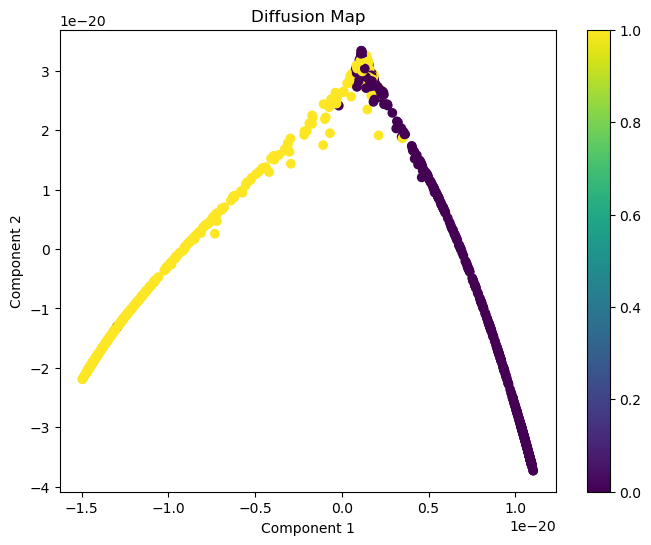

In [1]:
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from sklearn.datasets import make_moons, make_blobs, make_classification
from sklearn.manifold import TSNE
from scipy.sparse.csgraph import laplacian
from scipy.spatial.distance import pdist, squareform
from lund.lund import LearningbyUnsupervisedNonlinearDiffusion
from lund.utils import GraphExtractor
from model.utils import loadHSI,calculate_aligned_accuracy
import matplotlib.pyplot as plt
import scipy.io

# data_path, gt_path, data_name, gt_name = '/Users/seoli/Desktop/DIAMONDS/Tufts2024/data/SalinasA_corrected.mat', '/Users/seoli/Desktop/DIAMONDS/Tufts2024/data/SalinasA_gt.mat', 'salinasA_corrected', 'salinasA_gt'


# X, M, N, D, HSI, GT, Y, n, K = loadHSI(data_path, gt_path, data_name, gt_name)
X, GT = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
scipy.io.savemat('data.mat', {'X': X, 'GT': GT})

grid_size = int(np.ceil(np.sqrt(X.shape[0])))
print("GRID SIZE: ", grid_size)

print("Data shape:", X.shape)

# GT = GT - 1
# HSI = X.reshape((M, N, D))
Hyperparameters = {
    'Sigma': 1.0,
    'DiffusionNN': 10,
    
}

kde = KernelDensity(bandwidth=1.0)
kde.fit(X)
log_density = kde.score_samples(X)
p = np.exp(log_density)

graph_extractor = GraphExtractor()
G = graph_extractor.extract_graph(X)
print(G)

diffusion_map = graph_extractor.compute_diffusion_distances(G, X)
print('diffusion map shape: ', diffusion_map.shape)
if diffusion_map is not None:
    print('Diffusion map shape: ', diffusion_map.shape)
    print('Diffusion map:')
    print(diffusion_map)

    # Plotting the diffusion map
    plt.figure(figsize=(8, 6))
    plt.scatter(diffusion_map[:, 1], diffusion_map[:, 2], c=GT, cmap='viridis')
    plt.title('Diffusion Map')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.show()

t = 43

# C, K, Dt = LearningbyUnsupervisedNonlinearDiffusion(X, t, G, p)


# # print("Cluster labels:", C)
# # print("GT",GT)
# print("Number of clusters:", K)
# # print("Diffusion distances:", Dt)

# accuracy = calculate_aligned_accuracy(GT, C)
# print("Aligned Accuracy:", accuracy)

def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.show()
    
def plot_kde_density(X, title):
    # Create the KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x=X[:, 0], y=X[:, 1], cmap='viridis', fill=True, levels=20, thresh=0)
    plt.scatter(X[:, 0], X[:, 1], c='red', s=5, edgecolor='k')
    plt.title(title)
    plt.show()


# plot_clusters(diffusion_map, GT, "t-SNE of Diffusion Distances (Ground Truth)")
# plot_clusters(diffusion_map, C, "t-SNE of Diffusion Distances (LUND Clustering)")


# plot_clusters(X, C, f"LUND Clustering (Aligned Accuracy: {accuracy:.2f})")
# plot_clusters(X, GT, "Ground Truth")
# plot_kde_density(X, "KDE Density Estimation")

# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans_labels = kmeans.fit_predict(X)
# kmeans_accuracy = calculate_aligned_accuracy(GT, kmeans_labels)
# print("Aligned Accuracy (KMeans Clustering):", kmeans_accuracy)
# plot_clusters(X, kmeans_labels, f"KMeans Clustering (Aligned Accuracy: {kmeans_accuracy:.2f})")


